In [6]:
%load_ext watermark
%watermark -a 'Kamal Shrestha' -v -p torch,numpy,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Kamal Shrestha

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 8.11.0

torch : 1.13.1
numpy : 1.24.2
pandas: 1.5.3



In [1]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch


plt.rcParams["savefig.bbox"] = 'tight'

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

/raid/cs18resch11003/aditi/lglutide/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


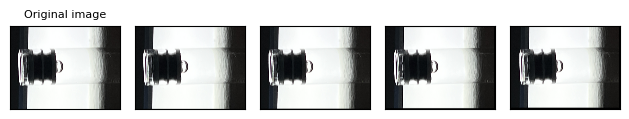

In [5]:
import torchvision.transforms as T

orig_img = Image.open("../data/A/A1.jpeg")
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

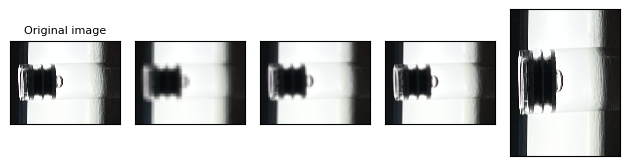

In [6]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

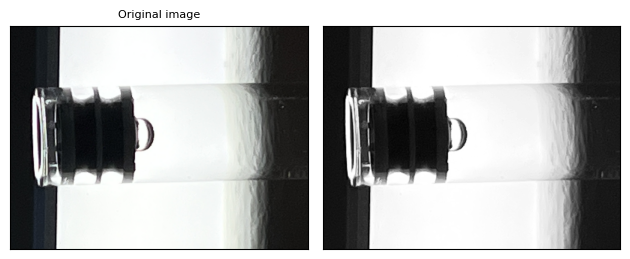

In [9]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

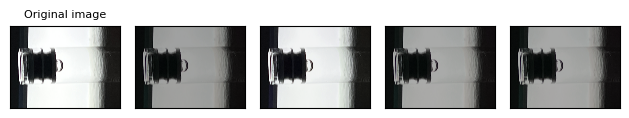

In [10]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

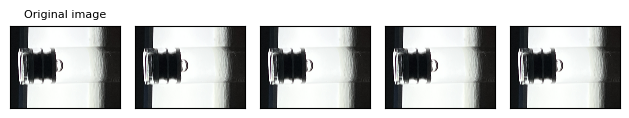

In [11]:
blurrer = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

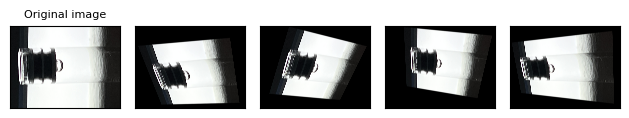

In [12]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

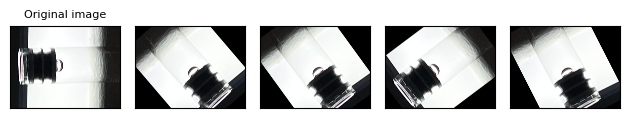

In [13]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

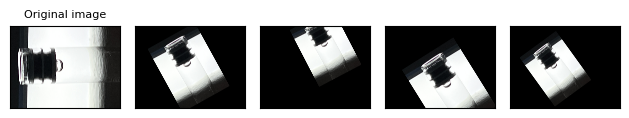

In [14]:
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

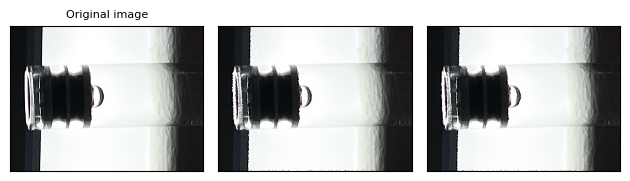

In [15]:
elastic_transformer = T.ElasticTransform(alpha=250.0)
transformed_imgs = [elastic_transformer(orig_img) for _ in range(2)]
plot(transformed_imgs)

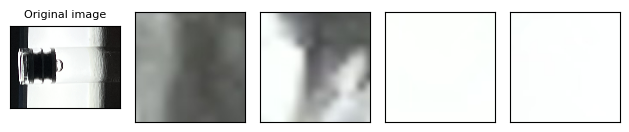

In [16]:
cropper = T.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

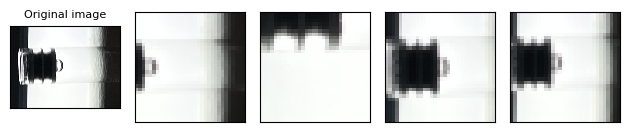

In [17]:
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

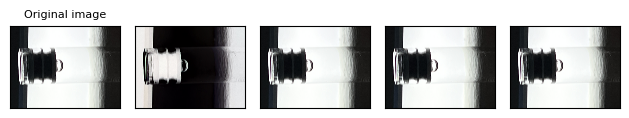

In [18]:
inverter = T.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

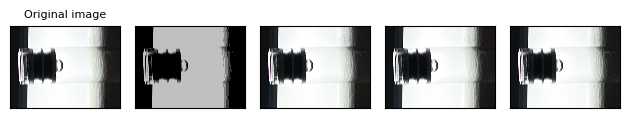

In [19]:
posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

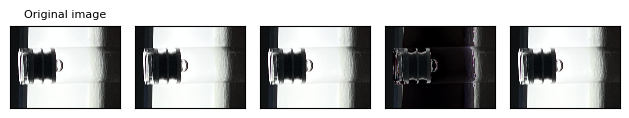

In [20]:
solarizer = T.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

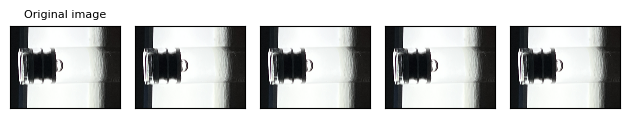

In [21]:
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

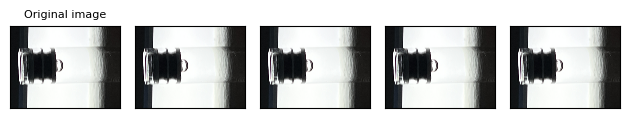

In [22]:
autocontraster = T.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

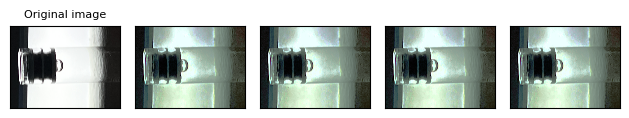

In [23]:
equalizer = T.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

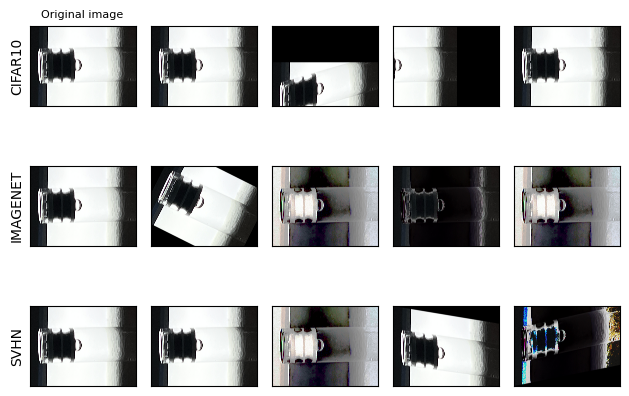

In [24]:
policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs, row_title=row_title)

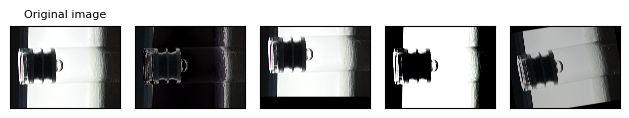

In [25]:
augmenter = T.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

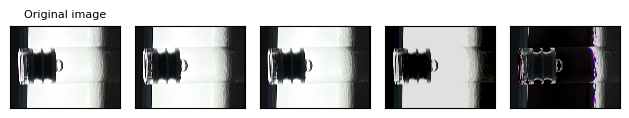

In [26]:
augmenter = T.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

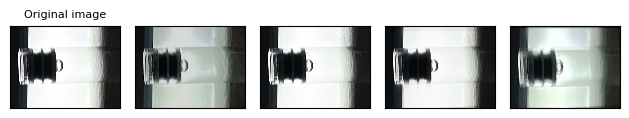

In [27]:
augmenter = T.AugMix()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

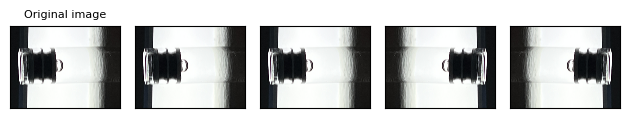

In [28]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

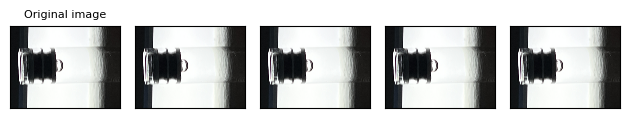

In [29]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)